<a href="https://colab.research.google.com/github/Alaa-abdelmajied/Pattern_Recognition_Sheets/blob/main/Sheet%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Used libraries

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import metrics

#Reading and spliting the dataset

In [ ]:
!unzip faces -d dataset

In [ ]:
def getDataMatrixFaces (path, imgNum, classNum):
  counter = 0
  imgSize = 92*112
  data = np.zeros((imgNum,imgSize))
  labels = np.zeros((imgNum,1))
  for folderNum in range(1,classNum+1):
    folderPath = 's' + str(folderNum)
    folderPath = os.path.join(path,folderPath)
    for imageNum in range(1,11):
      imagePath = str(imageNum) + '.pgm'
      imagePath = os.path.join(folderPath,imagePath)
      image = cv2.imread(imagePath,0)
      data[counter,:] = image.flatten()
      labels[counter] = int(folderNum)
      counter += 1
  return data, labels

In [ ]:
def splitDataMatrix(data, labels):

  imgSize = 92*112

  trainData = np.zeros((int(len(data)/2),imgSize))
  testData = np.zeros((int(len(data)/2),imgSize))
  testCount = 0;

  trainLabels = np.zeros((int(len(data)/2),1))
  testLabels = np.zeros((int(len(data)/2),1))
  trainCount = 0;

  for count in range(0,len(data)):
    if count%2 == 0:
      testData[testCount] = data[count]
      testLabels[testCount] = labels[count]
      testCount +=1
    else:
      trainData[trainCount] = data[count]
      trainLabels[trainCount] = labels[count]
      trainCount +=1
  
  return trainData, trainLabels, testData, testLabels

#Naive Bayes

In [ ]:
def naiveBayes(trainData,trainLabels,testData,testLabels):
  clf = GaussianNB()
  clf.fit(trainData, trainLabels.ravel())
  pred = clf.predict(testData)
  confusionMatrix = metrics.confusion_matrix(testLabels, pred)
  accuracy  = metrics.accuracy_score(testLabels,pred)
  print('ConfusionMatrix:\n',confusionMatrix)
  print('Accuracy: ',accuracy)

# Question 2

In [ ]:
data,labels= getDataMatrixFaces('/content/dataset', 400,40)
trainData, trainLabels, testData, testLabels = splitDataMatrix(data,labels)
naiveBayes(trainData, trainLabels, testData, testLabels)

ConfusionMatrix:
 [[5 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]]
Accuracy:  0.715


In [ ]:
data,labels= getDataMatrixFaces('/content/dataset', 400,40)
trainData, trainLabels, testData, testLabels = splitDataMatrix(data,labels)
pca = PCA(n_components=40)
reducedTrainData = pca.fit_transform(trainData)
reducedTestData = pca.transform(testData)
naiveBayes(reducedTrainData, trainLabels, reducedTestData, testLabels)

ConfusionMatrix:
 [[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 1 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [1 0 0 ... 0 0 3]]
Accuracy:  0.88


#Question 3

##Prepare dataset


Data Set:


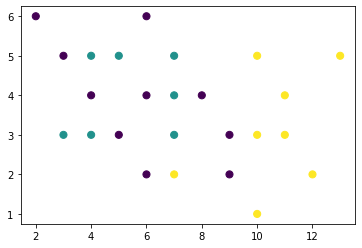

In [ ]:
c1 = np.array([[2,6],[3,5],[4,4],[5,3],[6,2],[6,4],[6,6],[8,4],[9,2],[9,3]])
c2 = np.array([[3,3],[4,3],[4,5],[5,5],[7,3],[7,4],[7,5]])
c3 = np.array([[7,2],[10,1],[10,3],[10,5],[11,3],[11,4],[12,2],[13,5]])
labels = [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3]
data = np.concatenate((c1, c2, c3), axis=0)
print('Data Set:')
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

##Calculate prior of each class

In [ ]:
p_c1 = labels.count(1)/len(labels)
p_c2 = labels.count(2)/len(labels)
p_c3 = labels.count(3)/len(labels)
print('Prior of class 1: ',p_c1)
print('Prior of class 2: ',p_c2)
print('Prior of class 3: ',p_c3)

Prior of class 1:  0.4
Prior of class 2:  0.28
Prior of class 3:  0.32


##Compute Mean and covariance of each class

In [ ]:
mean_c1 = np.mean(c1,axis=0)
centeredData_c1 = c1 - mean_c1
cov_c1 = np.cov(centeredData_c1.transpose())
mean_c2 = np.mean(c2,axis=0)
centeredData_c2 = c2 - mean_c2
cov_c2 =np.cov(centeredData_c2.transpose())
mean_c3 = np.mean(c3,axis=0)
centeredData_c3 = c3 - mean_c3
cov_c3 = np.cov(centeredData_c3.transpose())
print('Class 1 mean:\n',mean_c1)
print('Class 1 covariance:\n',cov_c1)
print('Class 2 mean:\n',mean_c2)
print('Class 2 covariance:\n',cov_c2)
print('Class 3 mean:\n',mean_c3)
print('Class 3 covariance:\n',cov_c3)

Class 1 mean:
 [5.8 3.9]
Class 1 covariance:
 [[ 5.73333333 -2.13333333]
 [-2.13333333  2.1       ]]
Class 2 mean:
 [5.28571429 4.        ]
Class 2 covariance:
 [[2.9047619  0.33333333]
 [0.33333333 1.        ]]
Class 3 mean:
 [10.5    3.125]
Class 3 covariance:
 [[3.14285714 1.07142857]
 [1.07142857 2.125     ]]


##Full Bias

##Full Bayes

In [ ]:
def likehood(mean,cov,point):
  fi_x = 1/(np.power(np.sqrt(2*np.pi),2)*np.sqrt(np.linalg.det(cov)))*np.exp(-np.dot((point-mean).T,np.dot(np.linalg.inv(cov),(point-mean)))/2)
  return fi_x

In [ ]:
def fullBayes(point):
  class1 = likehood(mean_c1,cov_c1,point)*p_c1
  class2 = likehood(mean_c2,cov_c2,point)*p_c2
  class3 = likehood(mean_c3,cov_c3,point)*p_c3
  max = class1
  classified = 1
  if class2 > max:
    max = class2
    classified = 2
  if class3 > max:
    max = class3
    classified = 3
  print('Classified to class: ',classified)

In [ ]:
print('Full Bayes:')
fullBayes([6,5])
fullBayes([9,4])
fullBayes([8,5])

Full Bayes:
Classified to class:  2
Classified to class:  3
Classified to class:  2


## Naive Bayes

In [ ]:
def naiveBayesQ3(point):
  clf = GaussianNB()
  clf.fit(data, labels)
  pred = clf.predict([point])
  print('Classified to class: ',pred[0])

In [ ]:
print('Naive Bayes:')
naiveBayesQ3([6,5])
naiveBayesQ3([9,4])
naiveBayesQ3([8,5])

Naive Bayes:
Classified to class:  2
Classified to class:  3
Classified to class:  1
